<a href="https://colab.research.google.com/github/priyariyyer/AIML_Projects/blob/main/HateTweetClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding Problem and Objective

In [ ]:
# There is a sample of social media tweets collected from a population.
# Objective is to classify the tweets as Hate or Harmless

#Data Gathering

In [ ]:
#Collect data from sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/train_E6oV3lV (1).csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df.shape

(31962, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Intuitive Data Modifications

In [ ]:
df.drop(["id"], axis=1,inplace=True)

In [ ]:
df.shape

(31962, 2)

## Data Quality Checks

In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
df.duplicated().sum()

np.int64(2432)

In [ ]:
df.drop_duplicates(inplace=True, keep='last')
df.shape

(29530, 2)

## Missing Data Handling

In [ ]:
df.isnull().sum()

,0
label,0
tweet,0


In [ ]:
# No missing data to handle

In [ ]:
#####################################################
# Data is reduced due to RAM usage constraints
#####################################################

In [ ]:
df.shape

(29530, 2)

In [ ]:
df[df['label']==0].shape

(27517, 2)

In [ ]:
df[df['label']==1].shape

(2013, 2)

In [ ]:
df_reduced = df.drop(df[(df['label']==0)].index[0:25504])
df_reduced

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df_reduced['label'].value_counts()

,count
label,
1,2013
0,2013


## Text Processing

In [ ]:
# text cleaning
# !pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

#create function to clean text
def clean_text(text):
  cleaned_text = []
  text = text.lower() # Normalize
  text = re.sub(f'[{string.punctuation}]', "", text) # Remove Punctuation
  stop_words = stopwords.words('english')
  words = word_tokenize(text) # Tokenize
  lemmatizer = WordNetLemmatizer()
  cleaned_text = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] #Lemmetize words & Remove Stopwords
  return " ".join([char for char in cleaned_text if char.isalnum()]) #Remove special characters

In [ ]:
df_reduced["cleaned_tweet"] = df_reduced["tweet"].apply(clean_text)
df_reduced

,label,tweet,cleaned_tweet
13,1,@user #cnn calls #michigan middle school 'buil...,user cnn call michigan middle school build wal...
14,1,no comment! in #australia #opkillingbay #se...,comment australia opkillingbay seashepherd hel...
17,1,retweet if you agree!,retweet agree
23,1,@user @user lumpy says i am a . prove it lumpy.,user user lumpy say prove lumpy
34,1,it's unbelievable that in the 21st century we'...,unbelievable 21st century wed need something l...
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate user isz
31958,0,to see nina turner on the airwaves trying to...,see nina turner airwave trying wrap mantle gen...
31959,0,listening to sad songs on a monday morning otw...,listening sad song monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",user sikh temple vandalised calgary wso condem...


## Feature Extraction

In [ ]:
#Vectorize text feature
# 1.Using Statistical Embedding
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vec = TfidfVectorizer()
x_tfidf = tfidf_vec.fit_transform(df_reduced['cleaned_tweet'])

count_vec = CountVectorizer()
x_count = count_vec.fit_transform(df_reduced['cleaned_tweet'])

In [ ]:
# 2.Using Semantic Embedding
# !pip install transformers torch

In [ ]:
from transformers import BertTokenizer, BertModel #use sentence-transformers
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

encodings = tokenizer.batch_encode_plus(
    df_reduced['cleaned_tweet'].tolist(), #input data for embedding
    add_special_tokens=True, #add special tokens 'CLS' and 'SEP' BERT requires specific input formatting, including special tokens like [CLS] at the beginning and [SEP] at the end of a sentence
    return_tensors='pt', #return PyTorch tensors
    padding=True, #pad to maximum sequence length
    truncation=True, #truncate text greater than maximum sequence length
    max_length=512 #define max length
    )


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
encodings

{'input_ids': tensor([[  101,  5310, 13229,  ...,     0,     0,     0],
        [  101,  7615,  2660,  ...,     0,     0,     0],
        [  101,  2128,  2102,  ...,     0,     0,     0],
        ...,
        [  101,  5962,  6517,  ...,     0,     0,     0],
        [  101,  5310, 17246,  ...,     0,     0,     0],
        [  101,  4067,  5310,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
input_ids = encodings['input_ids'] #extract input ids from encoded text
attention_mask = encodings['attention_mask'] #extract attention mask
print("Input IDs:", input_ids.shape)
print("Attention Mask:", attention_mask.shape)

Input IDs: torch.Size([4026, 41])
Attention Mask: torch.Size([4026, 41])


In [ ]:
#Generate embedding using Bert Model
import torch
with torch.no_grad():
  output = model_bert(input_ids, attention_mask=attention_mask)
  embeddings = output.last_hidden_state[:, 0, :] #take only batch_size and hidden_state

print("Embeddings:", embeddings.shape)

Embeddings: torch.Size([4026, 768])


In [ ]:
#extract embeddings in 2 D
x_bert = embeddings.detach().cpu().numpy()

NameError: name 'embeddings' is not defined

In [ ]:
x = df['cleaned_tweet']
y = df['label']
x.shape, y.shape

((29530,), (29530,))

## Data Visualization

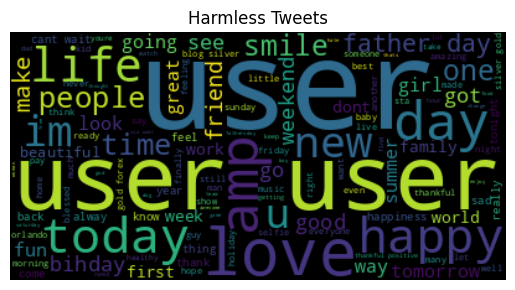

In [ ]:
from wordcloud import WordCloud

wc = WordCloud()
wc = wc.generate(" ".join(list(df[df['label']==0]['cleaned_tweet'])))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Harmless Tweets")
plt.show()

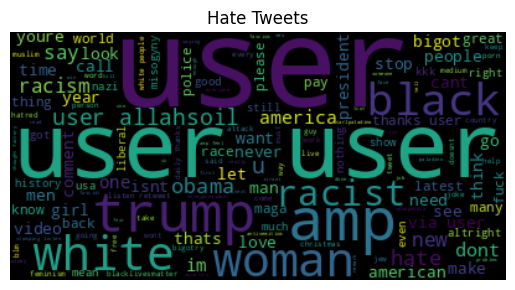

In [ ]:
wc = wc.generate(" ".join(list(df[df['label']==1]['cleaned_tweet'])))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Hate Tweets")
plt.show()

## Split Training & Testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17718,), (11812,), (17718,), (11812,))